# Section 1 : Submitters

**Submitters:
Yael Avraham,ID : 206656589 ,
Eden Fabrikant, ID: 212302541**


Kaggle link:
https://www.kaggle.com/edenfabrikant

# Section 2 : Overview

**House Prices Advanced Regression Techniques Competition - Project Overview**

In this Kaggle competition, we aim to predict the final sale price of homes located in Ames, Iowa, based on a diverse set of features.

As some people may put an emphasis on the number of rooms in the house, neighborhood or even the age of the house as the main predictor of the home price, we try to give more accurate predictions (SalePrice column) with many more features. In this competition we explore this feature with a given Dataset and utilize it for our model - minimizing the RMSE metric.

We will use a **Linear Regression model** to perform this prediction. Our workflow includes data exploration, processing of the data, statistical analyses, training the model, and evaluating its performance.  

# Section 3 : Imports and Definitions

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn import pipeline, preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection

import pandas as pd
import seaborn as sns # we will use it for showing the regression line

# define plt settings (you don't have to do it every time, you can you the default values)
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

# Section 4 : Mount to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to the new folder inside my google drive
folder_path = '/content/drive/My Drive/House_Ames_price_predict'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)


# Section 5 : Data Investigation and Preprocessing

We use the Ames Housing dataset that was compiled by Dean De Cock in this practice for the regression task.

we uploaded the train csv from the pc

In [ ]:

from google.colab import files

# This will open a file dialog to upload files from your computer
# uploading the train file
uploaded = files.upload()

Saving train.csv to train.csv


We use our train.csv input file.
The dataset variable called train_df.

We display the train file reseting the indexes.

pd - using the pandas library for reading the file and displaing it

numerical_train_df - including only the numerical column types.

In this project, we will not change object type since we didn't experiement with it yet in our course. we will handle only the numerical columns.

In [ ]:
#train_df - the dataset variable we work on
train_df = pd.read_csv('train.csv')

# Clearing the
train_df.reset_index(drop=True, inplace=True)
display(train_df)
print("Dataset shape: {}".format(train_df.shape))

# numerical_train_df - including only the numerical column types
numerical_train_df=train_df.select_dtypes(include=[np.number])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Dataset shape: (1460, 81)


The train.csv file is composed of 81 columns and 1460 entries.

The SalePrice column shows our true values (y).

Showing the columns names

In [ ]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Presenting the first 20 rows in the train data

In [ ]:
train_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


We try to understand how many rows have no value in each column

In [ ]:
# Show only the columns that actually have NaNs
train_df.isna().sum()[train_df.isna().sum() > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


,Feature,MissingPercentage
0,LotFrontage,17.739726
1,GarageYrBlt,5.547945
2,MasVnrArea,0.547945
3,LotArea,0.000000
4,MSSubClass,0.000000
5,Id,0.000000
6,OverallCond,0.000000
7,OverallQual,0.000000
8,YearRemodAdd,0.000000
9,YearBuilt,0.000000


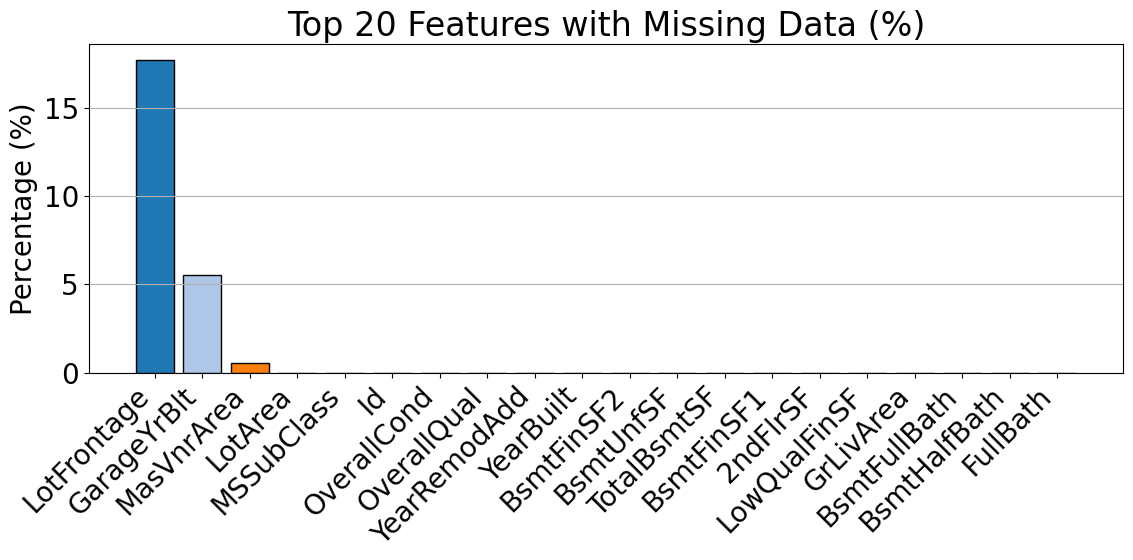

In [ ]:
# Percentege
missing_percent = numerical_train_df.isnull().mean() * 100

# Top 20 with most missing values
top_missing = missing_percent.sort_values(ascending=False).head(20)

# Table
top_missing_df = top_missing.reset_index()
top_missing_df.columns = ['Feature', 'MissingPercentage']

display(top_missing_df)

colors = plt.cm.tab20(np.linspace(0, 1, len(top_missing_df)))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_missing_df['Feature'], top_missing_df['MissingPercentage'], color=colors, edgecolor='black')
plt.title('Top 20 Features with Missing Data (%)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



As we can see there is no high precentage of nulls in the numerical columns.

Displaying the type of each column

In [ ]:
train_df.dtypes.to_frame(name='dtype')

,dtype
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


Column type distribution

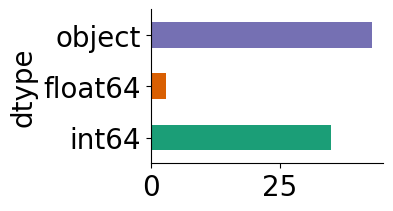

In [ ]:
plt.figure(figsize=(3, 2))
_df_0.groupby('dtype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


Display the dataset info, count, Nan, columns type, etc. to understand the train set.

As we can see there is no high precentage of nulls in the numerical columns.

Therefore, eliminating columns will be based on correlation and distribution of the feature.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

show train set statistics on each column

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


now we will delete the id column to avoid overfitting

In [ ]:
numerical_train_df = numerical_train_df.drop('Id', axis=1)
numerical_train_df1 = numerical_train_df
numerical_train_df2 = numerical_train_df

Showing the medians of each numeric column

In [ ]:
numerical_train_df.median(numeric_only=True)

,0
MSSubClass,50.0
LotFrontage,69.0
LotArea,9478.5
OverallQual,6.0
OverallCond,5.0
YearBuilt,1973.0
YearRemodAdd,1994.0
MasVnrArea,0.0
BsmtFinSF1,383.5
BsmtFinSF2,0.0


# Section 6 : Data Visualization

We want to Detect the most meaningful features in this dataset

## Section 6.1 : Histrogram

In this graphs we want to show the behavior of the numerical features that we suspect that are no good for our model.



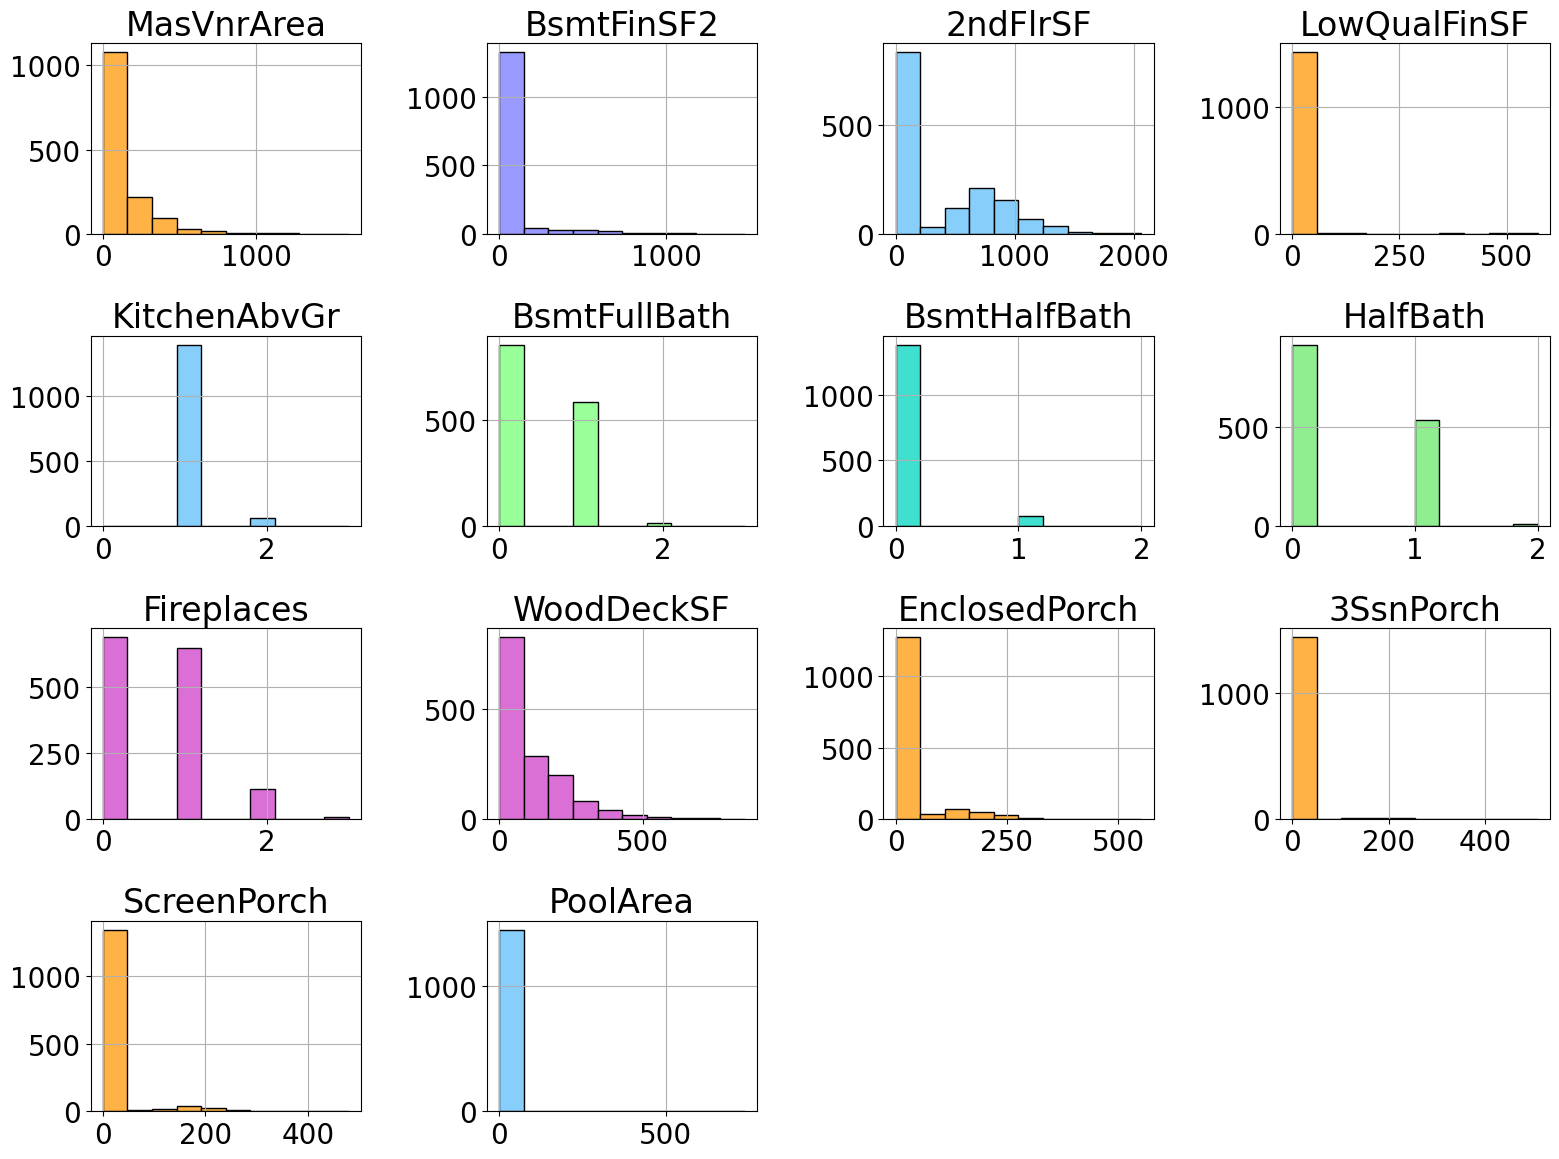

In [ ]:
import random

cols = ['MasVnrArea', 'BsmtFinSF2' ,'2ndFlrSF', 'LowQualFinSF',
        'KitchenAbvGr','BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces',
        'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
        'PoolArea']

colors = ['#FF9999', '#99FF99', '#9999FF', '#FFD700', '#87CEFA', '#FFB347', '#DA70D6', '#40E0D0', '#FA8072', '#90EE90']

# Size hist
plt.figure(figsize=(16, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 4, i)

    color = random.choice(colors)

    train_df[col].hist(bins=10, color=color, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()


We can differ from these graphs that columns distribution of - 'LowQualFinSF','KitchenAbvGr','ScreenPorch', 'KitchenAbvGr', 'BsmtHalfBath', '3SsnPorch', 'PoolArea' might harm the model. But it's not enough to delete these columns, so we will continue to investigate.

## Section 6.2 : Regplot

In this section, we are showing positive justification for the featuers that will stay in the model.

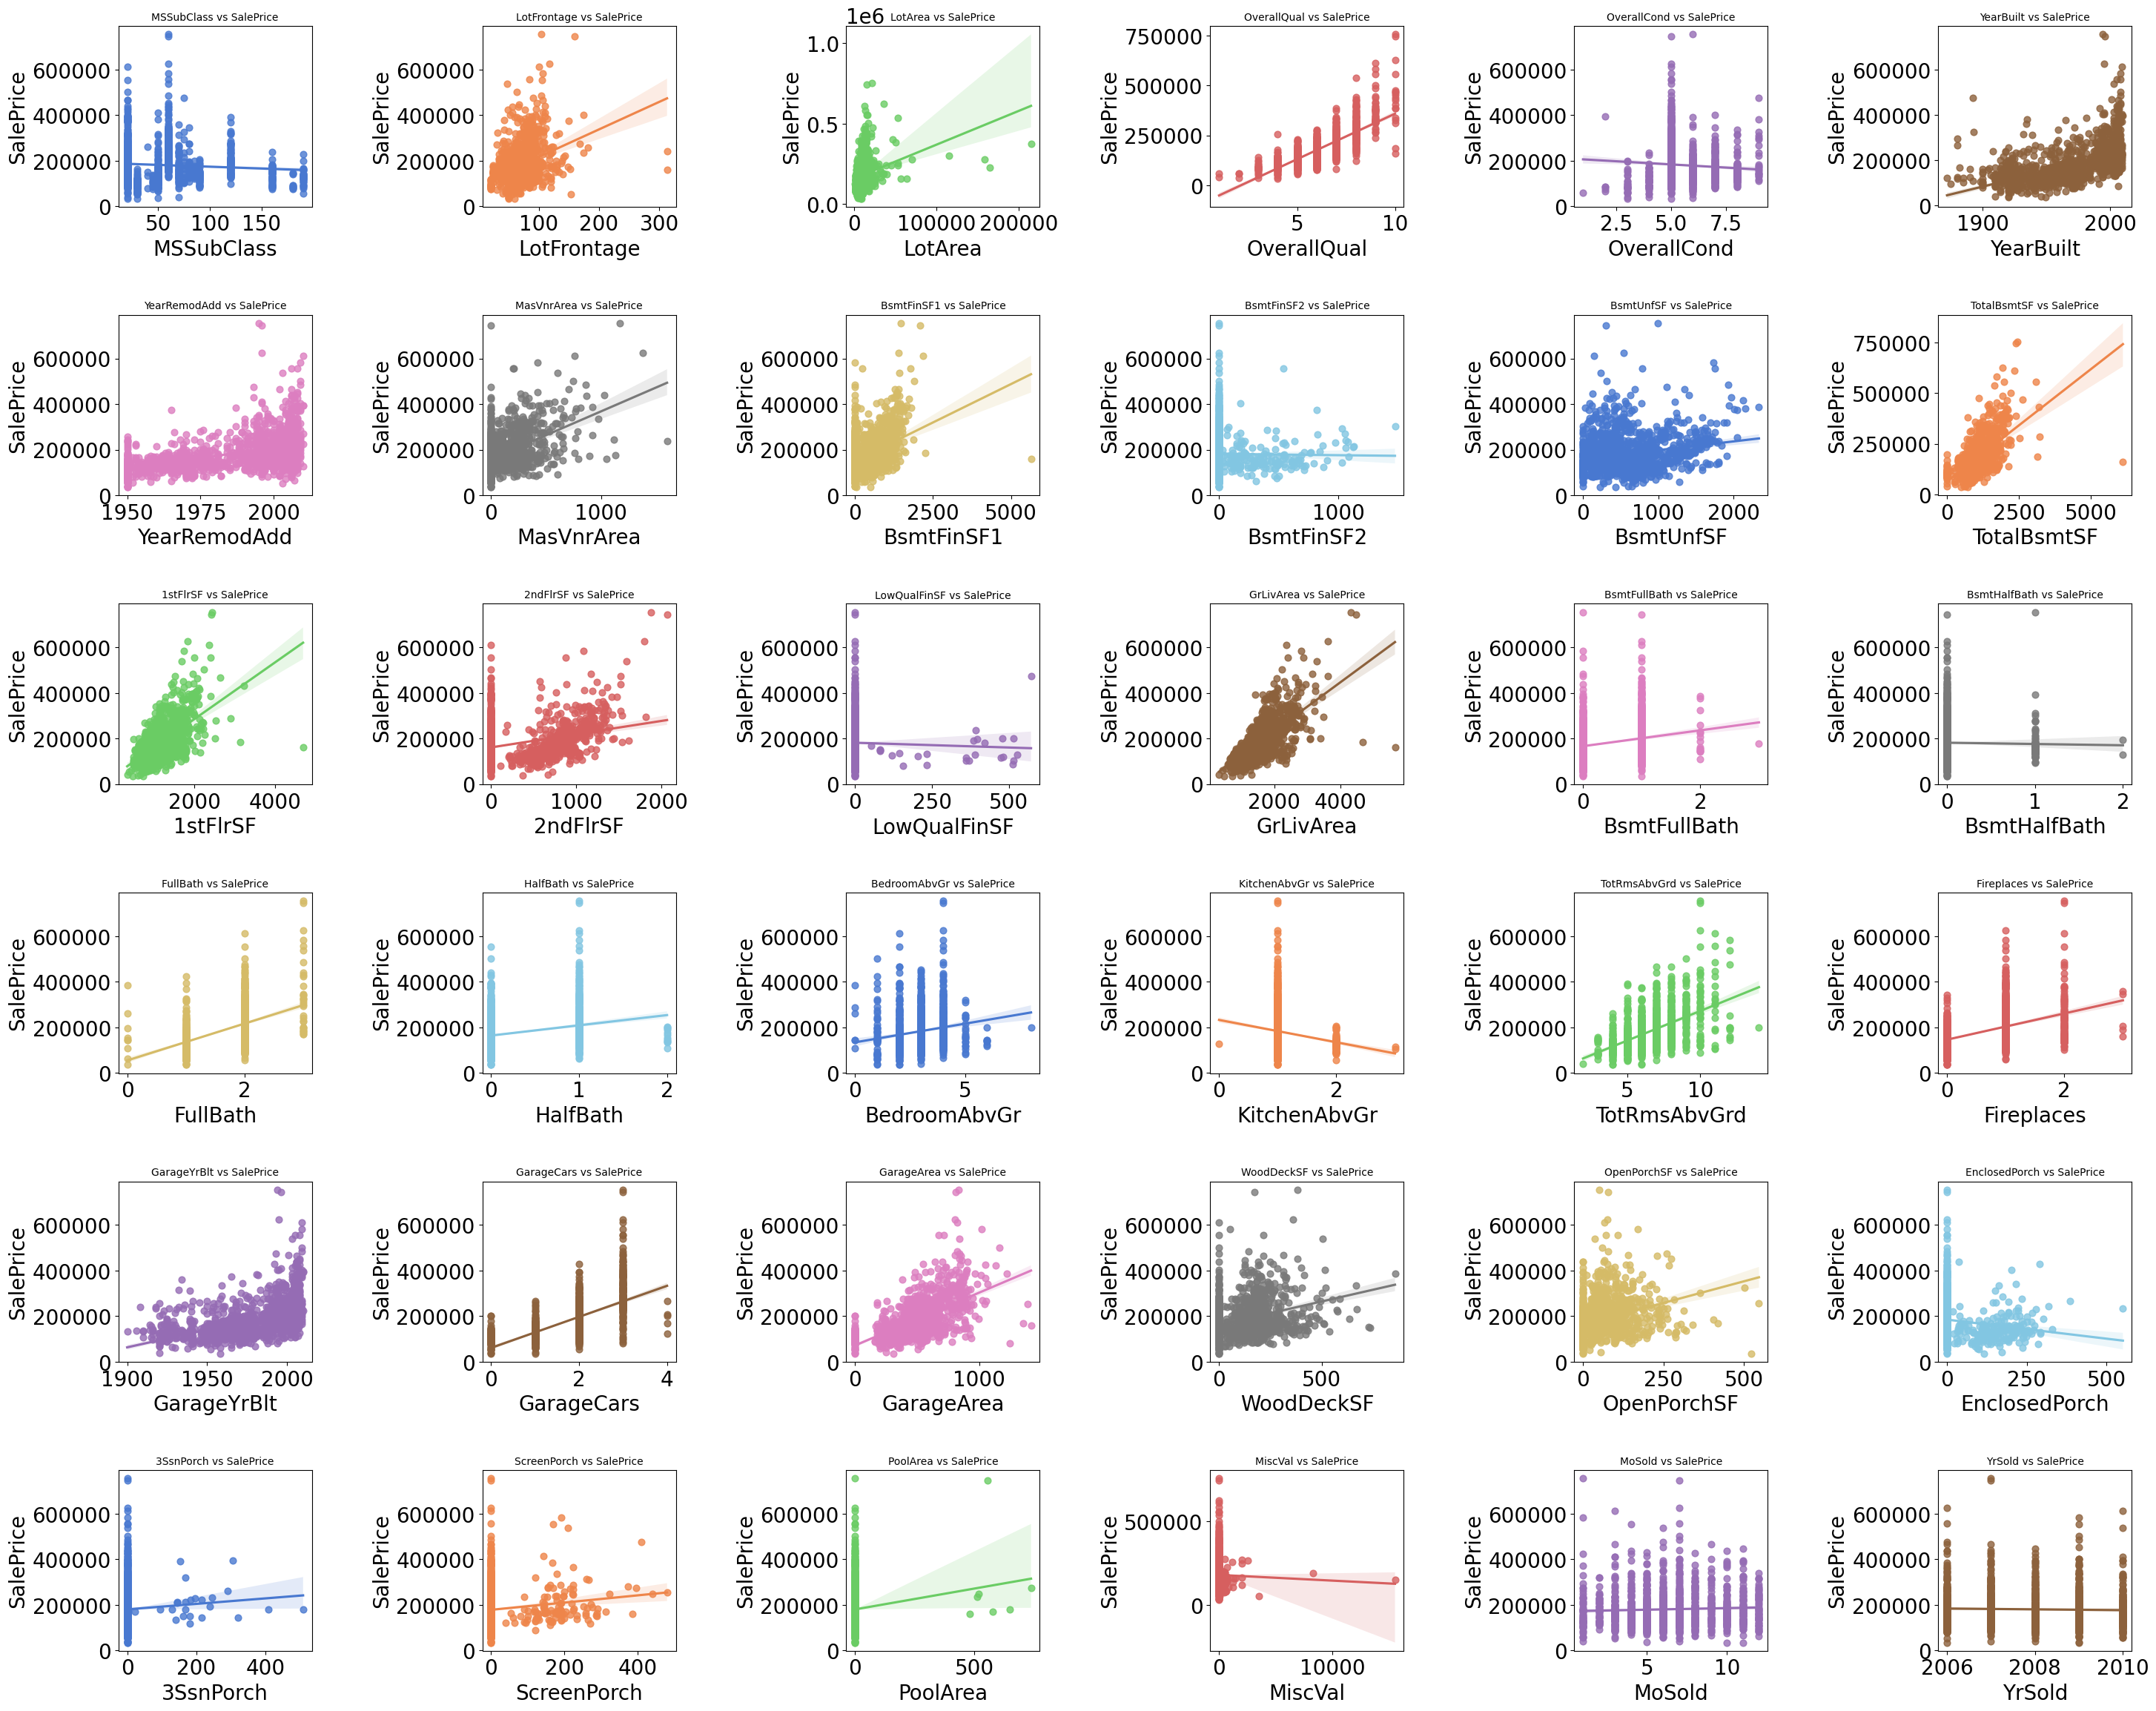

In [ ]:
def get_sns_cmap(n, name='muted'):
    return sns.color_palette(palette=name, n_colors=n)

def plot_reg_target_values_by_each_feature(df, target_column_name):
    features = df.columns[df.columns != target_column_name]
    n = len(features)
    nrows = math.ceil(math.sqrt(n))
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]
    plt.subplots_adjust(hspace=0.6, wspace=0.6)

    colors = get_sns_cmap(n)

    for i, col in enumerate(features):
        sns.regplot(x=col, y=target_column_name, data=df, color=colors[i], ax=axes[i], scatter_kws={"s": 40})
        axes[i].set_title(f'{col} vs {target_column_name}', fontsize=10)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout(pad=2.0)
    plt.show()

# Show plots
plot_reg_target_values_by_each_feature(numerical_train_df, 'SalePrice')

We will reffer to the suspicious columns.  

As we can see in the Regplot, the columns -'PoolArea', 'LowQualFinSF'  might indeed
not be included in the training of the model.

There are other suspicious columns which are 'ScreenPorch', '3SsnPorch','KitchenAbvGr'.

## Section 6.3 : Correlation matrix

We will display the correlation between each column and the true value ( 'SalePrice' ) with a heatmap (seaborn library)

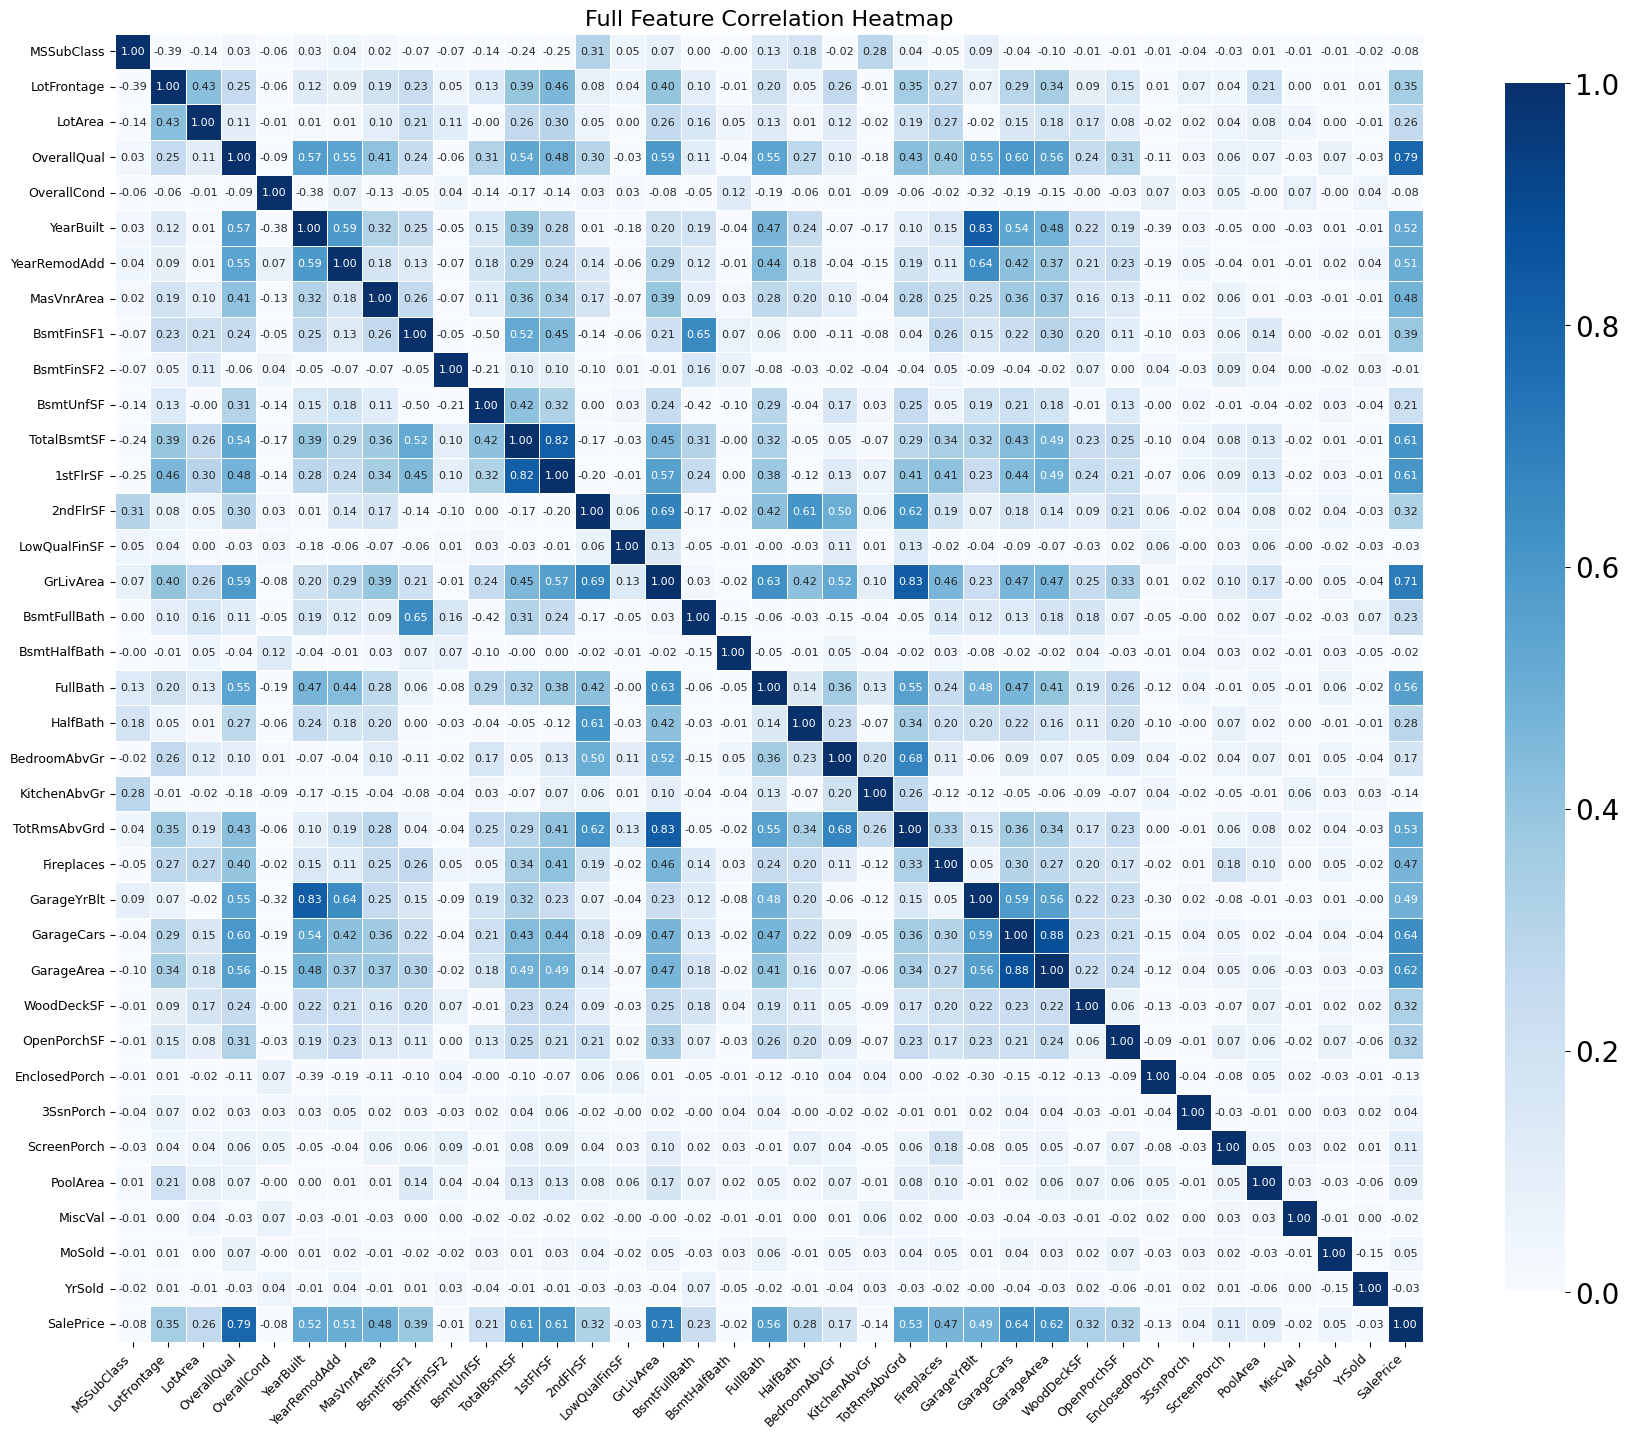

In [ ]:
# Compute absolute correlation matrix
cor = numerical_train_df.corr()

# Set figure size
plt.figure(figsize=(18, 16))

# Full heatmap (no mask!)
sns.heatmap(cor,
            cmap='Blues',
            annot=True,
            fmt=".2f",
            annot_kws={"size": 8},
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8},
            vmin=0, vmax=1)

# Ticks & layout
plt.title("Full Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


As the heatmap shows, the suspicions about
The columns -

'PoolArea', 'LowQualFinSF', 'ScreenPorch', '3SsnPorch'.

were justified.


have rather low correlation to the SalePrice column and to the other features in the data.

## Section 6.4 : Insights and Feature Selection Based on Data Visualization


According to the information that we've seen by now, the columns -
'PoolArea', 'LowQualFinSF'
do not suit to train the model. therefore, we will eliminate them from our model.

We will further investigate with another model the columns 'ScreenPorch', '3SsnPorch' in order to determine if it will benefit the model.

# Section 7 : Train and Test split

In this section we are clearing and training the data based on our conclusions in the previous section.

We are clearing the data by deleting the rows that contain null values since we didn't experiement with other solutions in our course.

In [ ]:
# This will open a file dialog to upload files from your computer
# Uploading the test file
uploaded = files.upload()

Saving test.csv to test.csv


## Section 7.1 : First Model

Clearning the first model with only two columns 'PoolArea', 'LowQualFinSF' to delete

In [ ]:
cols_to_drop_test1=['Id','PoolArea', 'LowQualFinSF']
# test

#Read the test file
test_df = pd.read_csv('test.csv')

# numerical_test_df - including only the numerical column types
numerical_test_df1=test_df.select_dtypes(include=[np.number])

# Cleaning - Deleting the rows in test that contain nulls.
numerical_test_df_clean1 = numerical_test_df1.dropna()

test_id1 = numerical_test_df_clean1['Id']

#Cleaning the test file with unnecessary columns
numerical_test_df1 = numerical_test_df_clean1.drop(cols_to_drop_test1, axis=1)



# train

# Cleaning - Deleting the rows in train that contain nulls.
numerical_train_df_clean1 = numerical_train_df1.dropna()

# Y - our target values
t1 = numerical_train_df_clean1['SalePrice']

# From section 6.4, we understood which columns to eliminate
cols_to_drop_train1 = ['PoolArea','LowQualFinSF', 'SalePrice']

# X - Final input data to insert to the model
X1 =  numerical_train_df_clean1.drop(cols_to_drop_train1, axis=1)

print('test : ')
display(numerical_test_df1)

print('train : ')
print('X')
display(X1)
print()
print('t')
display(t1)

test : 


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,80.0,13384,5,5,1969,1979,194.0,119.0,344.0,641.0,1104.0,1360,0,1360,1.0,0.0,1,0,3,1,8,1,1969.0,1.0,336.0,160,0,0,0,0,0,5,2006
1452,160,21.0,1533,4,5,1970,1970,0.0,408.0,0.0,138.0,546.0,546,546,1092,0.0,0.0,1,1,3,1,5,0,1970.0,1.0,286.0,0,0,0,0,0,0,12,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,9,2006


train : 
X


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,4,2010



t


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


We split the data to 80% train and 20% test.

In [ ]:
#Split to train and test using model_selection
X_train1, X_test1, t_train1, t_test1 = sklearn.model_selection.train_test_split(X1, t1, test_size=0.2, random_state=42)
print('X1 train')
display(X_train1)
print()
print('t1 train')
display(t_train1)
print()
print('X1 test')
display(X_test1)
print()
print('t1 test')
display(t_test1)

X1 train


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold
460,60,75.0,8004,8,5,2009,2009,110.0,544,0,288,832,832,1103,1935,1,0,2,1,3,1,8,0,2009.0,2,552,0,150,0,0,0,0,12,2009
479,30,50.0,5925,4,7,1937,2000,435.0,168,0,739,907,1131,0,1131,0,0,1,0,2,1,7,0,1995.0,2,672,0,72,0,0,0,0,3,2007
500,160,21.0,1890,6,5,1973,1973,285.0,356,0,316,672,672,546,1218,0,0,1,1,3,1,7,0,1973.0,1,264,144,28,0,0,0,0,5,2007
683,20,90.0,11248,9,5,2002,2002,215.0,1059,0,567,1626,1668,0,1668,1,0,2,0,3,1,7,1,2002.0,3,702,257,45,0,0,0,0,7,2007
596,70,60.0,3600,6,7,1910,1993,0.0,0,0,684,684,684,684,1368,0,0,1,0,3,1,7,0,1930.0,1,216,0,158,0,0,0,0,10,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,20,80.0,12984,5,6,1977,1977,459.0,1283,147,0,1430,1647,0,1647,1,0,2,0,3,1,7,1,1977.0,2,621,0,0,0,0,0,0,3,2006
162,20,95.0,12182,7,5,2005,2005,226.0,1201,0,340,1541,1541,0,1541,0,0,2,0,3,1,7,1,2005.0,2,532,0,70,0,0,0,0,5,2010
1364,160,30.0,3180,7,5,2005,2005,0.0,0,0,600,600,520,600,1200,0,0,2,1,2,1,4,0,2005.0,2,480,0,166,0,0,0,0,4,2006
1426,60,81.0,10944,7,5,1994,1994,448.0,1000,0,223,1223,1223,904,2127,1,0,2,1,3,1,5,2,1994.0,2,525,171,132,0,0,0,0,8,2008



t1 train


,SalePrice
460,263435
479,89471
500,113000
683,285000
596,114504
...,...
598,217500
162,220000
1364,144152
1426,271000



X1 test


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold
1297,180,35.0,3675,6,5,2005,2006,82.0,547,0,0,547,1072,0,1072,1,0,2,0,2,1,5,0,2005.0,2,525,0,44,0,0,0,0,6,2006
132,20,75.0,7388,5,6,1959,2002,0.0,405,0,658,1063,1327,0,1327,1,0,1,0,3,1,7,0,1974.0,2,624,0,0,0,0,0,0,7,2007
300,190,90.0,15750,5,5,1953,1953,56.0,841,0,324,1165,1336,0,1336,1,0,1,0,2,1,5,2,1953.0,1,375,0,0,0,0,0,0,6,2006
1307,20,60.0,8072,5,5,1994,1995,0.0,746,0,244,990,990,0,990,1,0,1,0,3,1,5,0,2000.0,2,480,0,64,0,0,0,0,5,2009
778,90,60.0,8400,5,5,1977,1977,320.0,0,0,0,0,2020,0,2020,0,0,2,0,4,2,10,2,1977.0,2,630,0,0,0,0,0,0,10,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,20,65.0,8767,7,5,2005,2005,0.0,24,0,1286,1310,1310,0,1310,0,0,2,0,3,1,6,1,2005.0,2,400,0,0,0,0,0,0,7,2006
543,120,34.0,4058,7,5,1998,1998,182.0,584,139,0,723,767,0,767,1,0,1,0,1,1,4,0,1998.0,1,367,120,40,0,0,0,0,6,2007
1062,190,85.0,13600,5,5,1900,1950,0.0,0,0,662,662,1422,915,2337,0,0,2,0,5,2,10,0,1945.0,2,560,0,57,0,0,0,0,9,2007
1026,20,73.0,9300,5,5,1960,1960,324.0,697,0,571,1268,1264,0,1264,1,0,1,0,3,1,6,2,1960.0,2,461,0,0,0,0,143,0,4,2010



t1 test


,SalePrice
1297,140000
132,150750
300,157000
1307,138000
778,144000
...,...
401,164990
543,133000
1062,90000
1026,167500


### Section 7.1.1 : Linear Regression Model Using Normal Equations

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Pipeline = StandardScaler + LinearRegression
model1 = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Training the model
model1.fit(X_train1, t_train1)

# Prediction
y_train1 = model1.predict(X_train1)
y_test1 = model1.predict(X_test1)


### Section 7.1.2 : R2 , RMSE and MSE scores

In [ ]:
# R²
print('R2 score on train:', model1.score(X_train1, t_train1))
print('R2 score on test:', model1.score(X_test1, t_test1))

# MSE
mse_train1 = mean_squared_error(t_train1, y_train1)
mse_test1 = mean_squared_error(t_test1, y_test1)
print(f'MSE on Train set: {mse_train1:.3f}')
print(f'MSE on Test set: {mse_test1:.3f}')

# RMSE
rmse_train1 = np.sqrt(mse_train1)
rmse_test1 = np.sqrt(mse_test1)
print(f'RMSE on Train set: {rmse_train1:.3f}')
print(f'RMSE on Test set: {rmse_test1:.3f}')

R2 score on train: 0.8073549240493538
R2 score on test: 0.7973351589965783
MSE on Train set: 1272816619.295
MSE on Test set: 1598482651.564
RMSE on Train set: 35676.556
RMSE on Test set: 39981.029


As we can see,  we achived R2 score that is approximatly 80%.

The RMSE values on both the train and test sets are close, indicating a well-generalized model without overfitting, and the results are reasonable given the problem context.

### Section 7.1.3 : Linear Regression Using SGD

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
SGD_reg1 = make_pipeline(StandardScaler(),SGDRegressor(alpha=0.01, learning_rate='invscaling', eta0=0.01, random_state=42)).fit(X_train1, t_train1)

y_train1 = SGD_reg1.predict(X_train1)
y_test1 = SGD_reg1.predict(X_test1)
print('R2 score on train', SGD_reg1.score(X_train1, t_train1))
print('R2 score on test', SGD_reg1.score(X_test1, t_test1))
print()
print('MSE on train', metrics.mean_squared_error(t_train1, y_train1))
print('MSE on test', metrics.mean_squared_error(t_test1, y_test1))
print()
print('RMSE on train',  np.sqrt(metrics.mean_squared_error(t_train1, y_train1)))
print('RMSE on test',  np.sqrt(metrics.mean_squared_error(t_test1, y_test1)))

R2 score on train 0.8042856326807657
R2 score on test 0.8071546430428757

MSE on train 1293095596.2900798
MSE on test 1521033229.071386

RMSE on train 35959.63843380631
RMSE on test 39000.42601140898


We can see that between SGDRegressor and LinearRegression the scores in SGDRegressor are better, therefore we will use SGDRegressor in the first model.

### Section 7.1.4 : Model Evaluation

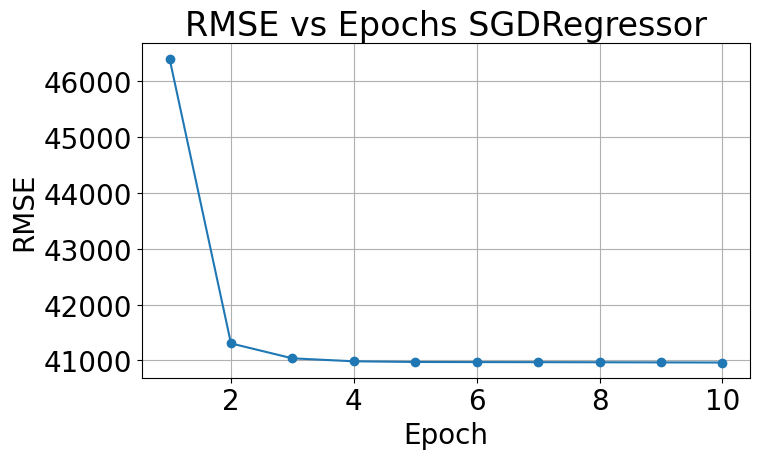

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define a pipeline with StandardScaler + SGDRegressor
# Using warm_start=True to continue training over epochs
sgd_pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor(max_iter=1, learning_rate='invscaling', eta0=0.01,
                 warm_start=True, alpha=0.01, penalty=None, random_state=42)
)

# Track RMSE per epoch
rmse_per_epoch_sgd = []
epochs = 10

# Train over multiple epochs
for epoch in range(epochs):
    sgd_pipeline.fit(X_train1, t_train1)
    y_pred1 = sgd_pipeline.predict(X_test1)
    rmse1 = np.sqrt(mean_squared_error(t_test1, y_pred1))
    rmse_per_epoch_sgd.append(rmse1)

# Plot RMSE over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), rmse_per_epoch_sgd, marker='o')
plt.title('RMSE vs Epochs SGDRegressor')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()


As we can see from the graph, the RMSE droped through epochs.

For clarification, the RMSE is showing the error of the house prices.

## Section 7.2 : Second Model

Now in the second model, we also droped the '3SsnPorch','ScreenPorch' (the suspected column) and come to conclusions.

In [ ]:
cols_to_drop_test2=['Id','PoolArea','LowQualFinSF','3SsnPorch','ScreenPorch']
# test

#Read the test file
test_df = pd.read_csv('test.csv')

# numerical_test_df - including only the numerical column types
numerical_test_df2=test_df.select_dtypes(include=[np.number])

# Cleaning - Deleting the rows in test that contain nulls.
numerical_test_df_clean2 = numerical_test_df2.dropna()

test_id2 = numerical_test_df_clean2['Id']

#Cleaning the test file with unnecessary columns
numerical_test_df2 = numerical_test_df_clean2.drop(cols_to_drop_test2, axis=1)


# train

# Cleaning - Deleting the rows in train that contain nulls.
numerical_train_df_clean2 = numerical_train_df2.dropna()

# Y - our target values
t2 = numerical_train_df_clean2['SalePrice']

# From section 6.4, we understood which columns to eliminate
cols_to_drop_train2 = ['PoolArea','LowQualFinSF','3SsnPorch','ScreenPorch','SalePrice' ]

# X - Final input data to insert to the model
X2 =  numerical_train_df_clean2.drop(cols_to_drop_train2, axis=1)

print('test : ')
display(numerical_test_df2)

print('train : ')
print('X')
display(X2)
print()
print('t')
display(t2)

test : 


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,80.0,13384,5,5,1969,1979,194.0,119.0,344.0,641.0,1104.0,1360,0,1360,1.0,0.0,1,0,3,1,8,1,1969.0,1.0,336.0,160,0,0,0,5,2006
1452,160,21.0,1533,4,5,1970,1970,0.0,408.0,0.0,138.0,546.0,546,546,1092,0.0,0.0,1,1,3,1,5,0,1970.0,1.0,286.0,0,0,0,0,12,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,9,2006


train : 
X


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,4,2010



t


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


We split the data to 80% train and 20% test.

In [ ]:
#Split to train and test using model_selection
X_train2, X_test2, t_train2, t_test2 = sklearn.model_selection.train_test_split(X2, t2, test_size=0.2, random_state=42)
print('X2 train')
display(X_train2)
print()
print('t2 train')
display(t_train2)
print()
print('X2 test')
display(X_test2)
print()
print('t2 test')
display(t_test2)

X2 train


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold
460,60,75.0,8004,8,5,2009,2009,110.0,544,0,288,832,832,1103,1935,1,0,2,1,3,1,8,0,2009.0,2,552,0,150,0,0,12,2009
479,30,50.0,5925,4,7,1937,2000,435.0,168,0,739,907,1131,0,1131,0,0,1,0,2,1,7,0,1995.0,2,672,0,72,0,0,3,2007
500,160,21.0,1890,6,5,1973,1973,285.0,356,0,316,672,672,546,1218,0,0,1,1,3,1,7,0,1973.0,1,264,144,28,0,0,5,2007
683,20,90.0,11248,9,5,2002,2002,215.0,1059,0,567,1626,1668,0,1668,1,0,2,0,3,1,7,1,2002.0,3,702,257,45,0,0,7,2007
596,70,60.0,3600,6,7,1910,1993,0.0,0,0,684,684,684,684,1368,0,0,1,0,3,1,7,0,1930.0,1,216,0,158,0,0,10,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,20,80.0,12984,5,6,1977,1977,459.0,1283,147,0,1430,1647,0,1647,1,0,2,0,3,1,7,1,1977.0,2,621,0,0,0,0,3,2006
162,20,95.0,12182,7,5,2005,2005,226.0,1201,0,340,1541,1541,0,1541,0,0,2,0,3,1,7,1,2005.0,2,532,0,70,0,0,5,2010
1364,160,30.0,3180,7,5,2005,2005,0.0,0,0,600,600,520,600,1200,0,0,2,1,2,1,4,0,2005.0,2,480,0,166,0,0,4,2006
1426,60,81.0,10944,7,5,1994,1994,448.0,1000,0,223,1223,1223,904,2127,1,0,2,1,3,1,5,2,1994.0,2,525,171,132,0,0,8,2008



t2 train


,SalePrice
460,263435
479,89471
500,113000
683,285000
596,114504
...,...
598,217500
162,220000
1364,144152
1426,271000



X2 test


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold
1297,180,35.0,3675,6,5,2005,2006,82.0,547,0,0,547,1072,0,1072,1,0,2,0,2,1,5,0,2005.0,2,525,0,44,0,0,6,2006
132,20,75.0,7388,5,6,1959,2002,0.0,405,0,658,1063,1327,0,1327,1,0,1,0,3,1,7,0,1974.0,2,624,0,0,0,0,7,2007
300,190,90.0,15750,5,5,1953,1953,56.0,841,0,324,1165,1336,0,1336,1,0,1,0,2,1,5,2,1953.0,1,375,0,0,0,0,6,2006
1307,20,60.0,8072,5,5,1994,1995,0.0,746,0,244,990,990,0,990,1,0,1,0,3,1,5,0,2000.0,2,480,0,64,0,0,5,2009
778,90,60.0,8400,5,5,1977,1977,320.0,0,0,0,0,2020,0,2020,0,0,2,0,4,2,10,2,1977.0,2,630,0,0,0,0,10,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,20,65.0,8767,7,5,2005,2005,0.0,24,0,1286,1310,1310,0,1310,0,0,2,0,3,1,6,1,2005.0,2,400,0,0,0,0,7,2006
543,120,34.0,4058,7,5,1998,1998,182.0,584,139,0,723,767,0,767,1,0,1,0,1,1,4,0,1998.0,1,367,120,40,0,0,6,2007
1062,190,85.0,13600,5,5,1900,1950,0.0,0,0,662,662,1422,915,2337,0,0,2,0,5,2,10,0,1945.0,2,560,0,57,0,0,9,2007
1026,20,73.0,9300,5,5,1960,1960,324.0,697,0,571,1268,1264,0,1264,1,0,1,0,3,1,6,2,1960.0,2,461,0,0,0,0,4,2010



t2 test


,SalePrice
1297,140000
132,150750
300,157000
1307,138000
778,144000
...,...
401,164990
543,133000
1062,90000
1026,167500


### Section 7.2.1 : Linear Regression Model Using Normal Equations

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model2 = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Training the model
model2.fit(X_train2, t_train2)

# Prediction
y_train2 = model2.predict(X_train2)
y_test2 = model2.predict(X_test2)

### Section 7.2.2 :  R2 , RMSE and MSE scores

In [ ]:
# R²
print('R2 score on train:', model2.score(X_train2, t_train2))
print('R2 score on test:', model2.score(X_test2, t_test2))

# MSE
mse_train2 = mean_squared_error(t_train2, y_train2)
mse_test2 = mean_squared_error(t_test2, y_test2)
print(f'MSE on Train set: {mse_train2:.6f}')
print(f'MSE on Test set: {mse_test2:.6f}')

# RMSE
rmse_train2 = np.sqrt(mse_train2)
rmse_test2 = np.sqrt(mse_test2)
print(f'RMSE on Train set: {rmse_train2:.6f}')
print(f'RMSE on Test set: {rmse_test2:.6f}')

R2 score on train: 0.8050165940057588
R2 score on test: 0.7991122203400565
MSE on Train set: 1288266094.586379
MSE on Test set: 1584466398.353994
RMSE on Train set: 35892.423916
RMSE on Test set: 39805.356403


### Section 7.2.3 : Linear Regression Using SGD

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
SGD_reg2 = make_pipeline(StandardScaler(),SGDRegressor(alpha=0.01, learning_rate='invscaling', eta0=0.01, random_state=42)).fit(X_train2, t_train2)

y_train2 = SGD_reg2.predict(X_train2)
y_test2 = SGD_reg2.predict(X_test2)
print('R2 score on train', SGD_reg2.score(X_train2, t_train2))
print('R2 score on test', SGD_reg2.score(X_test2, t_test2))
print()
print('MSE on train', metrics.mean_squared_error(t_train2, y_train2))
print('MSE on test', metrics.mean_squared_error(t_test2, y_test2))
print()
print('RMSE on train',  np.sqrt(metrics.mean_squared_error(t_train2, y_train2)))
print('RMSE on test',  np.sqrt(metrics.mean_squared_error(t_test2, y_test2)))

R2 score on train 0.801686937294136
R2 score on test 0.8092560446337016

MSE on train 1310265319.7323506
MSE on test 1504458800.2248557

RMSE on train 36197.58720871255
RMSE on test 38787.353612032566


We can see that between SGDRegressor and LinearRegression the scores in SGDRegressor are better, therefore we will use SGDRegressor in the second model.
The second model is better, means that by droping the columns '3SsnPorch','ScreenPorch' makes the model better.

### Section 7.2.4 : Model Evaluation

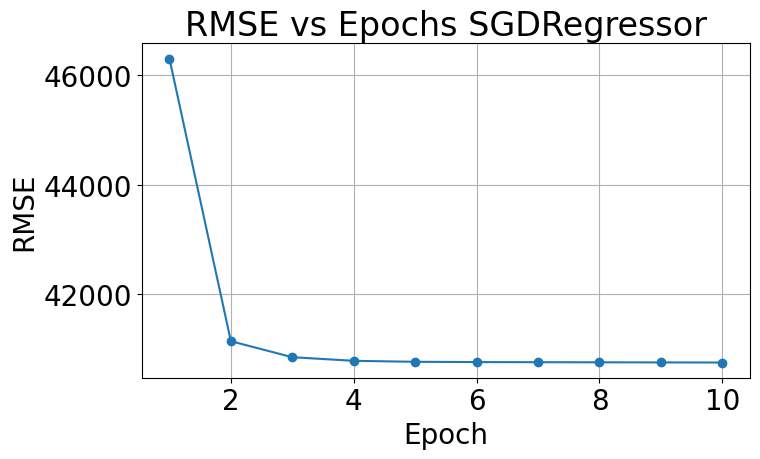

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define a pipeline with StandardScaler + SGDRegressor
# Using warm_start=True to continue training over epochs
sgd_pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor(max_iter=1, learning_rate='invscaling', eta0=0.01,
                 warm_start=True, alpha=0.01, penalty=None, random_state=42)
)

# Track RMSE per epoch
rmse_per_epoch_sgd = []
epochs = 10

# Train over multiple epochs
for epoch in range(epochs):
    sgd_pipeline.fit(X_train2, t_train2)
    y_pred2 = sgd_pipeline.predict(X_test2)
    rmse2 = np.sqrt(mean_squared_error(t_test2, y_pred2))
    rmse_per_epoch_sgd.append(rmse2)

# Plot RMSE over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), rmse_per_epoch_sgd, marker='o')
plt.title('RMSE vs Epochs SGDRegressor')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()


As we can see from the graph, the RMSE droped through epochs.

For clarification, the RMSE is showing the error of the house prices.

As we can see there are less exeptions in the second model than the first model - the second model is better

,Model,Alpha,CV_avg_RMSE
4,Ridge,100.00,39494.62
11,ElasticNet,0.10,39609.73
3,Ridge,10.00,39805.39
9,Lasso,100.00,39834.03
10,ElasticNet,0.01,39856.13
2,Ridge,1.00,39903.65
8,Lasso,10.00,39916.17
1,Ridge,0.10,39929.16
7,Lasso,1.00,39930.69
0,Ridge,0.01,39933.01


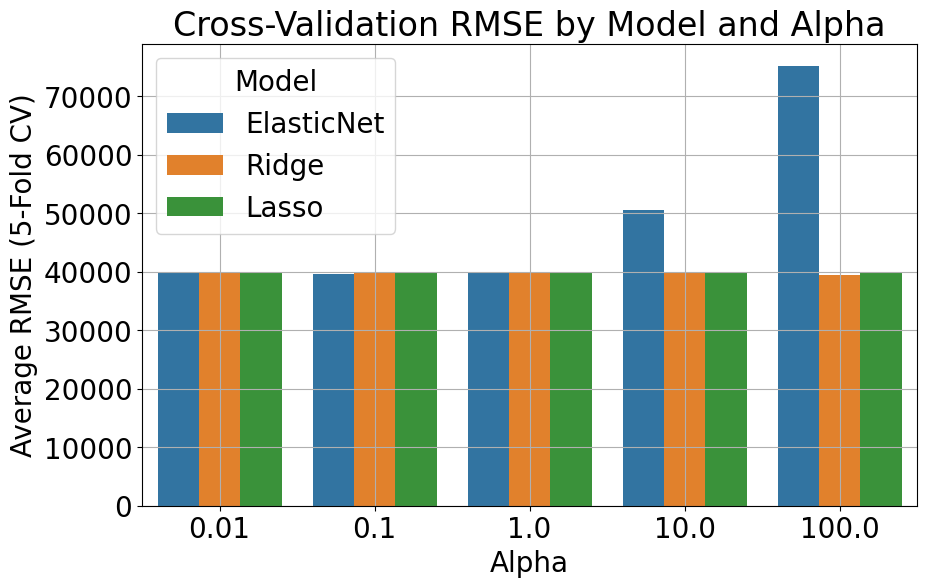

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge, Lasso, ElasticNet

models = {
    'Ridge': Ridge,
    'Lasso': Lasso,
    'ElasticNet': ElasticNet
}

# Multiple alphas
alphas = [0.01, 0.1, 1, 10, 100]
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

results = []

for model_name, model_class in models.items():
    for alpha in alphas:
        model2 = make_pipeline(
            StandardScaler(),
            model_class(alpha=alpha, random_state=42, max_iter=10000)
        )
        neg_mse_scores = cross_val_score(model2, X2, t2, cv=5, scoring=mse_scorer)
        rmse = np.sqrt(-neg_mse_scores.mean())
        results.append({
            'Model': model_name,
            'Alpha': alpha,
            'CV_avg_RMSE': round(rmse, 2)
        })

# Showing the table
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='CV_avg_RMSE')
display(results_df_sorted)

# Comperison graph
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_sorted, x='Alpha', y='CV_avg_RMSE', hue='Model')
plt.title('Cross-Validation RMSE by Model and Alpha')
plt.xlabel('Alpha')
plt.ylabel('Average RMSE (5-Fold CV)')
plt.grid(True)
plt.show()


As we can see, Optimal performances is achieved for alpha value of 0.1 and 0.01, we chose alpha=0.01

# Section 8 : Submition

In this section after we finished our work, we submit our final prediction into the kaggle competition and showing our place in the leaderboard

In [ ]:


# Final prediction by sgd model 2
y_pred =SGD_reg2.predict(numerical_test_df2)


submission_clean = pd.DataFrame({
    'Id': test_id2,
    'SalePrice': y_pred
})

all_ids = test_df['Id']
predicted_ids = set(test_id2)
missing_ids = list(set(all_ids) - predicted_ids)

# Mean
mean_prediction = y_pred.mean()


submission_missing = pd.DataFrame({
    'Id': missing_ids,
    'SalePrice': mean_prediction
})


submission_full = pd.concat([submission_clean, submission_missing])


submission_full = submission_full.sort_values('Id')

# Saving to Google Drive
save_path = "/content/drive/MyDrive/House_Ames_price_predict/submission.csv"
submission_full.to_csv(save_path, index=False)

print("Submission to Google drive was succesful", save_path)


Submission to Google drive was succesful /content/drive/MyDrive/House_Ames_price_predict/submission.csv


## Ssection 8.1 :  Leaderboard and the score in kaggle

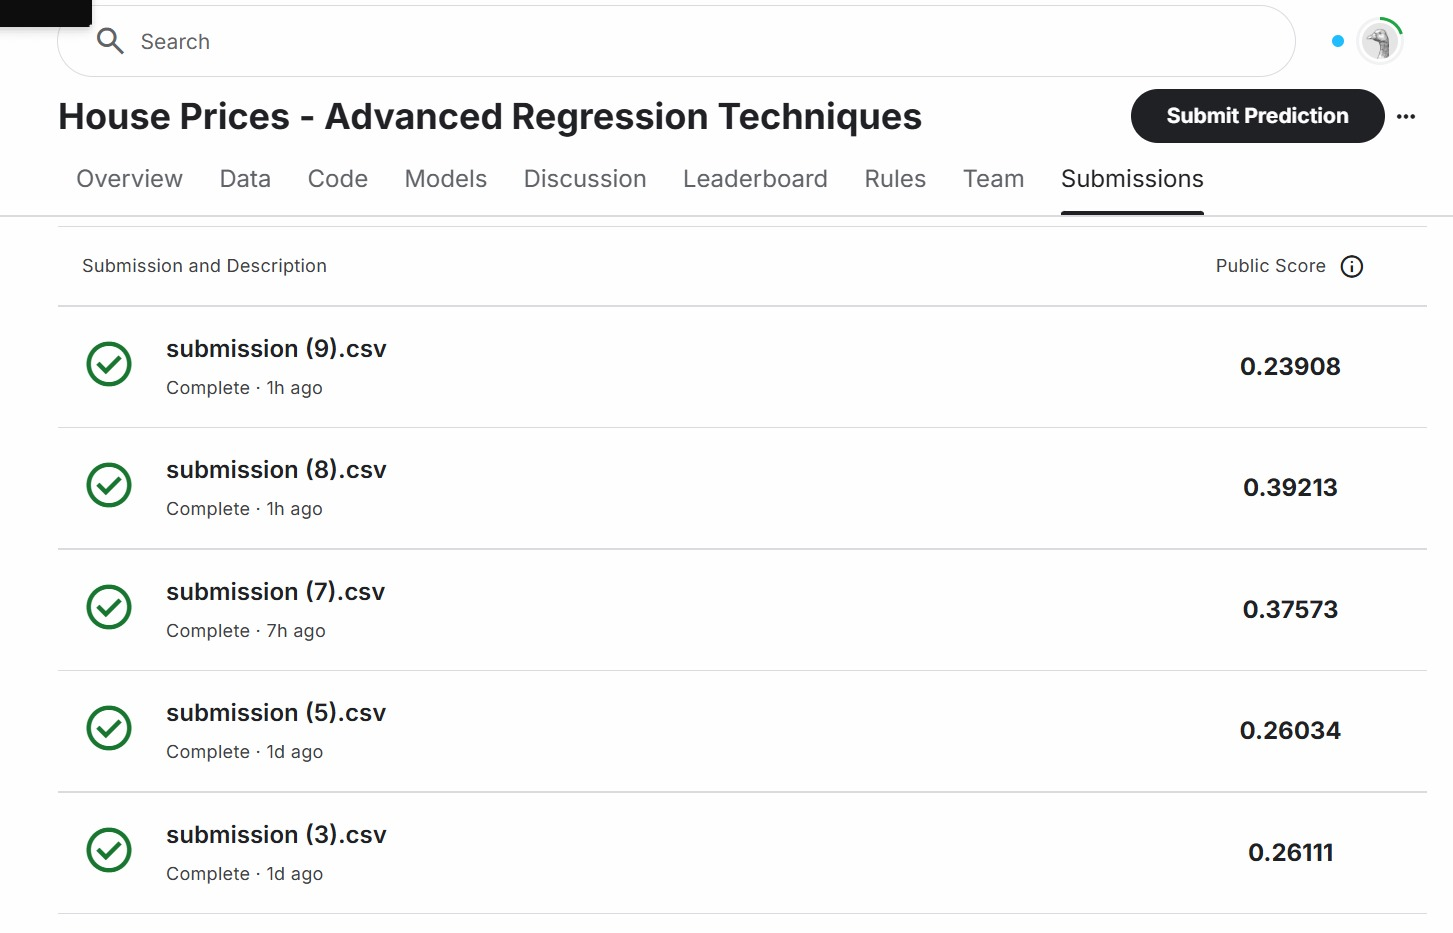

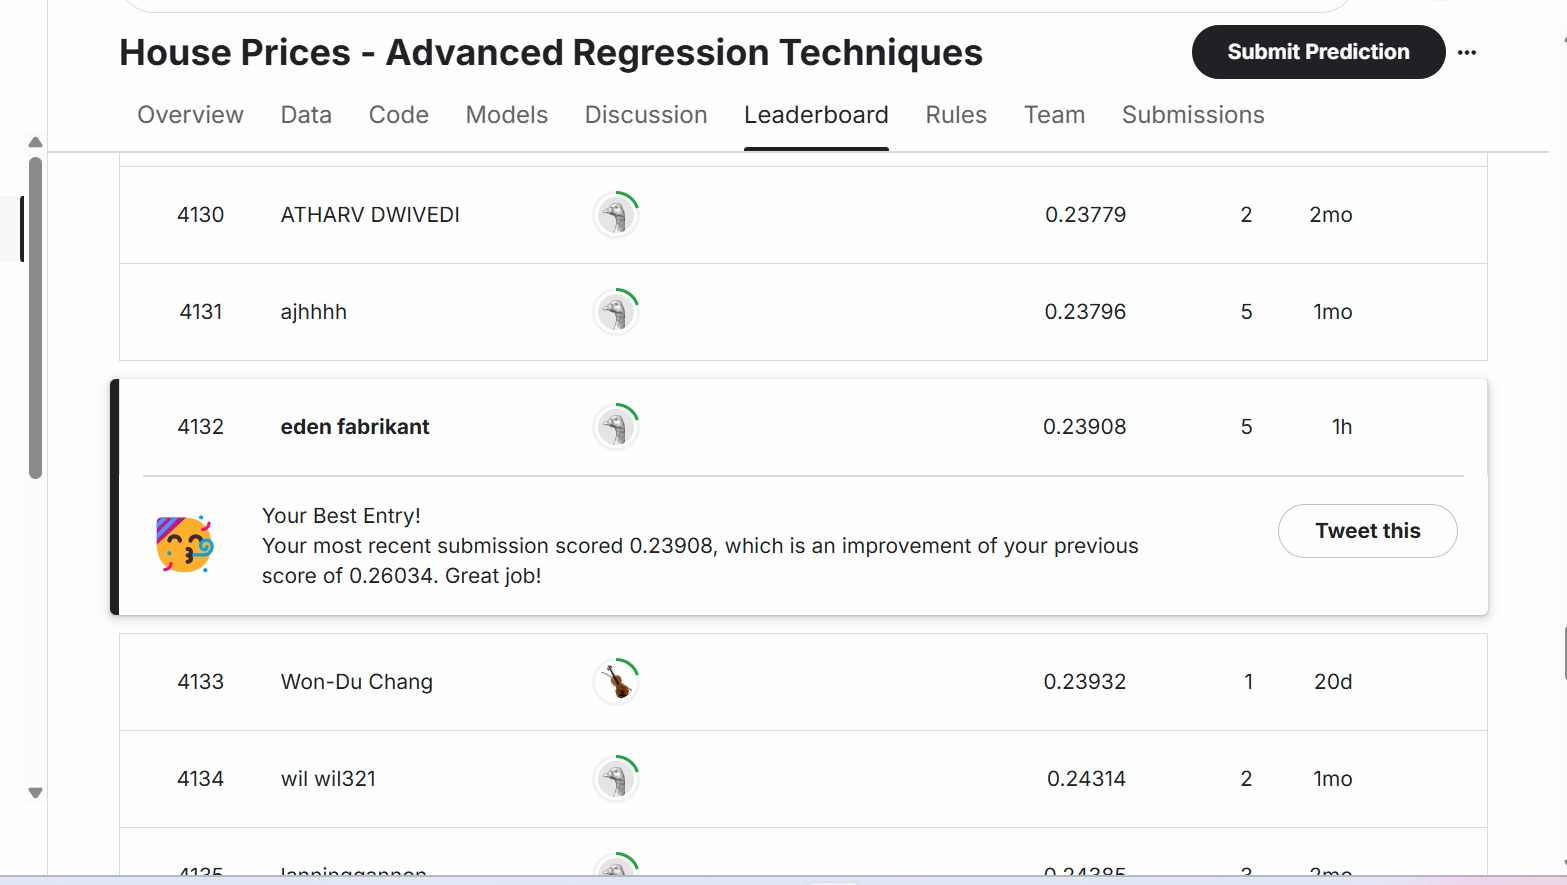

## Section 8.2 : Summary

In our project, we aimed to predict the house prices in Ames. We started by understanding the data we were working on : displaying the columns and the type of each column and figuring out the relevant data.

To clean the data, we used Data Visualization.

We started by displaying the suspicious columns in histograms, we discovered the distribution of the features and as the final verdict, we made a correlation matrix.

After that, we trained the cleaned data using  'Linear Regression' model (splitting the data into 80% training and 20% test).

We evaluated the model by the R2 score and RMSE score.

We used different regularization methods indicating the best Alpha that will give us the lowest RMSE score In the cross validation.

eventually predicting the house price for each ID.

The main thing that worked well for us was analyzing the data well and creating a model that have stable predictions.

The main difficulty we faced was dealing with excessive dropping of missing values since lack of experience.

Also the performance optimization in the regularization part, didn't go smoothly since regularized models were highly sensitive to changes.


## Section 8.3 : Resources

We used and got insperation from multiple resources :

Notebook by our lecturer Asaf foox -

https://colab.research.google.com/drive/19cqaxz1dcKGtdyZbUR2KX3cunMHzXupm?usp=drive_link

Notebook by Gusthema -

https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf

Notebook by kayrahanozcan -

https://www.kaggle.com/code/kayrahanozcan/house-price-prediction-ames-housing-dataset

kaggle website -

https://www.kaggle.com/

kaggle house pricing competition -

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
